# ANHA4 Spin-up Runs

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
def plot_Arctic(nav_lon, nav_lat, var, lev, cmap, title, ax):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, var, lev, cmap=cmap, extend='both')
    proj.contour(x, y, var, lev, linewidths=0.5, colors=('gray',))
    ax.set_title(title, fontsize=14)
    return CS, proj

In [4]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

# Spin-up @ 2002 × 3

The wrong code:

```fortran
      DO i = 1, jpi
         DO j = 1, jpj
            DO k = 1, jpk
               IF (Ba_boundary(i, j, k)>0.5) THEN
                  trn(i, j, k, jpmyt1) = Ba_ini(i, j, k)
                  trn(i, j, k, jpmyt1) = d18O_ini(i, j, k)
               ENDIF
            ENDDO
         ENDDO
      ENDDO
```

In [5]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP01_5d_20100101_20100316_ptrc_T.nc')
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [6]:
river_name = ['Pechora',"Ob' + Pur.", 'Yenisey', 'Olenek', 'Yana', 'Indigirka', 'Kolyma', 'Mackenzie', \
              'Sev. Dvina', 'Lena', 'Khatanga', 'Taimyra', 'Pyasina', 'Yukon']
lon_river = np.array([52, 78, 88, 123, 136, 148, 159, -135, 42, 133, 103, 100, 88, -167.3])
lat_river = np.array([67, 71, 70, 72, 71, 70, 69, 67.5, 65, 71, 72, 76, 73, 60])+3

strait = ['Bering Strait']
lon_strait = np.array([-169])
lat_strait = np.array([67])

In [7]:
x_river, y_river = Nts.nearest_search(nav_lon, nav_lat, lon_river, lat_river)
x_strait, y_strait = Nts.nearest_search(nav_lon, nav_lat, lon_strait, lat_strait)

In [8]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/Simulations/spinup/SPIN_UP_01_1m_20020101_20021231_ptrc_T.nc')
Ba1 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[1], y_river[1]]
MK_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[7], y_river[7]]
KO_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[6], y_river[6]]
LN_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[9], y_river[9]]
YK_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[13], y_river[13]]
BeringS_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_strait[0], y_strait[0]]

ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/Simulations/spinup/SPIN_UP_02_1m_20020101_20021231_ptrc_T.nc')
Ba2 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[1], y_river[1]]
MK_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[7], y_river[7]]
KO_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[6], y_river[6]]
LN_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[9], y_river[9]]
YK_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[13], y_river[13]]
BeringS_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_strait[0], y_strait[0]]

ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/Simulations/spinup/SPIN_UP_03_1m_20020101_20021231_ptrc_T.nc')
Ba3 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba3 = ptrc_obj.variables['Ba'][:, 0, x_river[1], y_river[1]]
MK_Ba3 = ptrc_obj.variables['Ba'][:, 0, x_river[7], y_river[7]]
KO_Ba3 = ptrc_obj.variables['Ba'][:, 0, x_river[6], y_river[6]]
LN_Ba3 = ptrc_obj.variables['Ba'][:, 0, x_river[9], y_river[9]]
YK_Ba3 = ptrc_obj.variables['Ba'][:, 0, x_river[13], y_river[13]]
BeringS_Ba3 = ptrc_obj.variables['Ba'][:, 0, x_strait[0], y_strait[0]]

In [9]:
Ob_Ba = np.array(list(Ob_Ba1)+list(Ob_Ba2)+list(Ob_Ba3))
MK_Ba = np.array(list(MK_Ba1)+list(MK_Ba2)+list(MK_Ba3))
KO_Ba = np.array(list(KO_Ba1)+list(KO_Ba2)+list(KO_Ba3))
LN_Ba = np.array(list(LN_Ba1)+list(LN_Ba2)+list(LN_Ba3))
YK_Ba = np.array(list(YK_Ba1)+list(YK_Ba2)+list(YK_Ba3))
BeringS_Ba = np.array(list(BeringS_Ba1)+list(BeringS_Ba2)+list(BeringS_Ba3))

In [11]:
L=0; lev1 = range(0, 150, 15)

/home/yingkai/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/yingkai/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


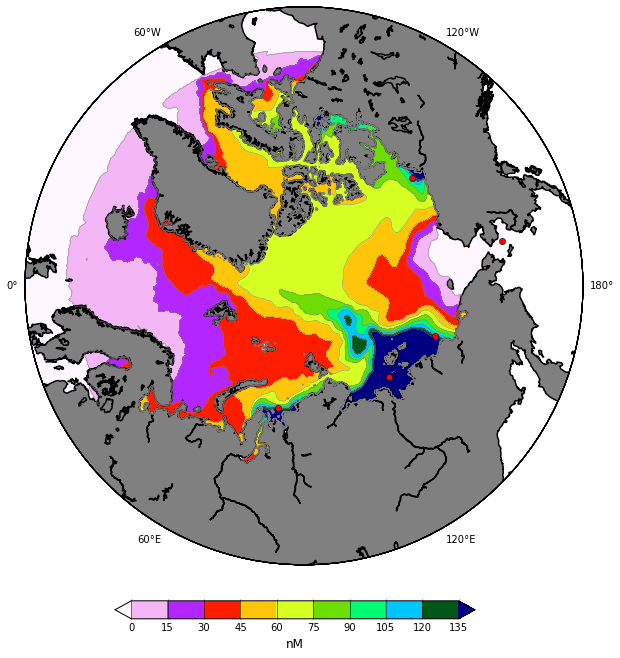

In [12]:
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba3[L, :, :], lev1, cmap=plt.cm.gist_ncar_r, extend='both')
proj.contour(x, y, Ba3[L, :, :], lev1, linewidths=0.5, colors=('gray',))
for i in [1, 7, 6, 9, 13]:
    proj.plot(x[x_river[i], y_river[i]], y[x_river[i], y_river[i]], 'ro')
    
cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=20)
CBar.set_ticks(lev1)
#ax.set_title('Difference between two dilution strategy', fontsize=14)

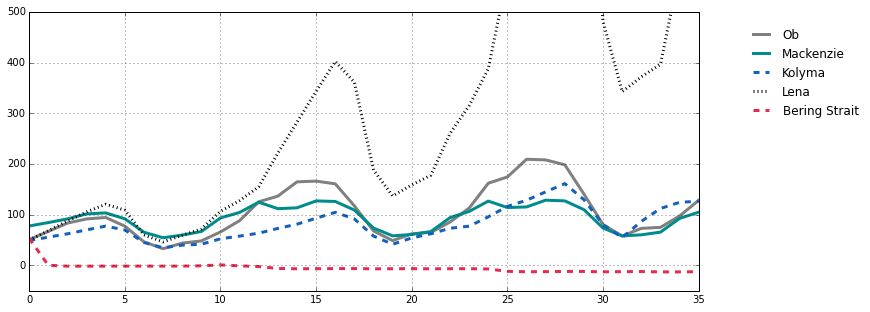

In [10]:
fig=plt.figure(figsize=(12, 5))
ax = fig.gca(); ax.grid()
ax.plot(Ob_Ba, 'k-', color='gray', lw=3, label='Ob')
ax.plot(MK_Ba, 'k-', color=DC, lw=3, label='Mackenzie')
ax.plot(KO_Ba, 'k--', color=DE, lw=3, label='Kolyma')
ax.plot(LN_Ba, 'k:', lw=3, label='Lena')
ax.plot(BeringS_Ba, 'k--', color=AM, lw=3, label='Bering Strait')
#ax.plot(YK_Ba, 'k-', color='r', lw=3, label='Yukon')
ax.set_ylim(-50, 500)
LG=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 